In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [31]:
import numpy as np
import tensorflow as tf
import random
import os

# Set seeds for reproducibility
def set_seeds(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seeds(42)

In [32]:
customer_df = pd.read_csv('./Churn_Modelling.csv')

In [33]:
customer_df= customer_df.drop('RowNumber', axis=1)
customer_df= customer_df.drop('CustomerId', axis=1)
customer_df= customer_df.drop('Surname', axis=1)

In [34]:

import tensorflow as tf
import random

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [35]:
customer_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
X = customer_df.drop('Exited', axis=1)
y = customer_df['Exited']

In [37]:
categorical_features = ['Geography', 'Gender']
# numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_features=['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
print("Numeric Features are", numeric_features)
print("Categorical Features are", categorical_features)

Numeric Features are ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Categorical Features are ['Geography', 'Gender']


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 42)

In [39]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [40]:
col_names = numeric_features
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

In [41]:
def one_hot_encode(df, col_names):
    """
    Perform one-hot encoding on specified categorical columns of a DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the categorical columns.
    col_names (list of str): List of column names to one-hot encode.

    Returns:
    pd.DataFrame: The DataFrame with one-hot encoded columns.
    """
    # Perform one-hot encoding on the specified columns
    df_encoded = pd.get_dummies(df, columns=col_names, drop_first=True, dtype='float64')

    return df_encoded

In [42]:
col_names = categorical_features
X_train = one_hot_encode (X_train, col_names)
X_test = one_hot_encode (X_test, col_names)

## RNN with no uner/over sampling

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming X_train and y_train are already defined and preprocessed
# Convert DataFrame to NumPy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# One-hot encode y_train and y_test (for multi-class classification)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Reshape data for RNN (LSTM expects 3D input: [samples, timesteps, features])
X_train_reshaped = X_train_array.reshape(-1, X_train_array.shape[1], 1)
X_test_reshaped = X_test_array.reshape(-1, X_test_array.shape[1], 1)

# RNN model definition (using LSTM without Embedding)
rnn_no_sampling = Sequential([
    LSTM(32, input_shape=(X_train_reshaped.shape[1], 1)),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Softmax for multi-class classification
])

rnn_no_sampling.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_no_sampling.fit(X_train_reshaped, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)




Epoch 1/10
200/200 [==============================] - 3s 8ms/step - loss: 0.5193 - accuracy: 0.7914 - val_loss: 0.4872 - val_accuracy: 0.8000
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4884 - accuracy: 0.7941 - val_loss: 0.4887 - val_accuracy: 0.7969
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4847 - accuracy: 0.7950 - val_loss: 0.4816 - val_accuracy: 0.8006
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4810 - accuracy: 0.7964 - val_loss: 0.4787 - val_accuracy: 0.8019
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4795 - accuracy: 0.7986 - val_loss: 0.4768 - val_accuracy: 0.8025
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4785 - accuracy: 0.7992 - val_loss: 0.4745 - val_accuracy: 0.8044
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4759 - accuracy: 0.8012 - val_loss: 0.4738 - val_accuracy: 0.8006
Epoch 

In [44]:
# Evaluate the model
y_pred = rnn_no_sampling.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it back to class labels
y_test_classes = np.argmax(y_test_categorical, axis=1)

print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

63/63 [==============================] - 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      1593
           1       0.68      0.07      0.13       407

    accuracy                           0.80      2000
   macro avg       0.74      0.53      0.51      2000
weighted avg       0.78      0.80      0.74      2000



In [45]:
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score, accuracy_score, roc_auc_score

# Evaluate the RNN model
y_pred = rnn_no_sampling.predict(X_test_reshaped)  # Get model predictions
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# If y_test is one-hot encoded, convert it back to class labels
y_test_classes = np.argmax(y_test_categorical, axis=1)

# Calculate performance metrics
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
f2 = fbeta_score(y_test_classes, y_pred_classes, beta=2, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# For binary classification, you need to provide probabilities for roc_auc_score
# If this is binary classification, use the probabilities of the positive class
if y_pred.shape[1] == 2:  # Check if this is binary classification
    y_pred_prob = y_pred[:, 1]  # Probabilities for the positive class
    roc_auc = roc_auc_score(y_test_classes, y_pred_prob)
else:
    roc_auc = np.nan  # ROC AUC is not applicable for multi-class directly

# Create a list to store the metrics
metrics = [(recall, precision, f1, f2, accuracy, roc_auc)]

# Create a DataFrame to store the scores
rnn_score = pd.DataFrame(data=metrics, columns=['Recall', 'Precision', 'F1 Score', 'F2 Score', 'Accuracy', 'ROC AUC'])

# Insert a column for the model name
rnn_score.insert(0, 'Model', 'RNN with no Under/Over Sampling')

# Display the DataFrame
rnn_score


63/63 [==============================] - 0s 2ms/step


,Model,Recall,Precision,F1 Score,F2 Score,Accuracy,ROC AUC
0,RNN with no Under/Over Sampling,0.8045,0.781732,0.735821,0.773344,0.8045,0.691496


# Optimized

In [46]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, fbeta_score, accuracy_score, roc_auc_score

# Assuming X_train and y_train are already defined and preprocessed
# Convert DataFrame to NumPy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# One-hot encode y_train and y_test (for multi-class classification)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Reshape data for RNN (LSTM expects 3D input: [samples, timesteps, features])
X_train_reshaped = X_train_array.reshape(-1, X_train_array.shape[1], 1)
X_test_reshaped = X_test_array.reshape(-1, X_test_array.shape[1], 1)

# RNN model definition (using Bidirectional LSTM)
rnn_optimized = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1))),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    LSTM(32),  # Reduced size after the bidirectional layer
    Dropout(0.3),
    BatchNormalization(),  # Batch Normalization for better training stability
    Dense(y_train_categorical.shape[1], activation='softmax')  # Softmax for multi-class classification
])

# Compile the model with a learning rate scheduler
optimizer = Adam(learning_rate=0.001)
rnn_optimized.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = rnn_optimized.fit(
    X_train_reshaped, y_train_categorical,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

# Evaluate the model
y_pred = rnn_optimized.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test_categorical back to class labels
y_test_classes = np.argmax(y_test_categorical, axis=1)




Epoch 1/10
200/200 [==============================] - 11s 23ms/step - loss: 0.5686 - accuracy: 0.7222 - val_loss: 0.4974 - val_accuracy: 0.8000
Epoch 2/10
200/200 [==============================] - 3s 14ms/step - loss: 0.4978 - accuracy: 0.7923 - val_loss: 0.4897 - val_accuracy: 0.8000
Epoch 3/10
200/200 [==============================] - 3s 15ms/step - loss: 0.4836 - accuracy: 0.7991 - val_loss: 0.4770 - val_accuracy: 0.8006
Epoch 4/10
200/200 [==============================] - 3s 15ms/step - loss: 0.4798 - accuracy: 0.7995 - val_loss: 0.4673 - val_accuracy: 0.8056
Epoch 5/10
200/200 [==============================] - 3s 14ms/step - loss: 0.4743 - accuracy: 0.8044 - val_loss: 0.4587 - val_accuracy: 0.8075
Epoch 6/10
200/200 [==============================] - 3s 15ms/step - loss: 0.4685 - accuracy: 0.8009 - val_loss: 0.4510 - val_accuracy: 0.8131
Epoch 7/10
200/200 [==============================] - 3s 14ms/step - loss: 0.4649 - accuracy: 0.8072 - val_loss: 0.4485 - val_accuracy: 0.813

In [47]:
# Calculate performance metrics
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
f2 = fbeta_score(y_test_classes, y_pred_classes, beta=2, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# For binary classification, use probabilities for ROC AUC Score
if y_pred.shape[1] == 2:  # Check if this is binary classification
    y_pred_prob = y_pred[:, 1]  # Probabilities for the positive class
    roc_auc = roc_auc_score(y_test_classes, y_pred_prob)
else:
    roc_auc = np.nan  # ROC AUC is not applicable for multi-class directly

# Create a list to store the metrics
metrics = [(recall, precision, f1, f2, accuracy, roc_auc)]

# Create a DataFrame to store the scores
rnn_score = pd.DataFrame(data=metrics, columns=['Recall', 'Precision', 'F1 Score', 'F2 Score', 'Accuracy', 'ROC AUC'])

# Insert a column for the model name
rnn_score.insert(0, 'Model', 'RNN with Bidirectional LSTM and Optimization')

# Display the DataFrame
rnn_score

,Model,Recall,Precision,F1 Score,F2 Score,Accuracy,ROC AUC
0,RNN with Bidirectional LSTM and Optimization,0.8145,0.795497,0.763735,0.790342,0.8145,0.717793


## RNN with Random Oversampling

In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, fbeta_score, accuracy_score, roc_auc_score



# Perform random oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_array.reshape(X_train_array.shape[0], -1), y_train)

# Convert resampled labels back to categorical if multi-class
y_resampled_categorical = to_categorical(y_resampled)

# Reshape the resampled data back for RNN
X_resampled_reshaped = X_resampled.reshape(-1, X_train.shape[1], 1)

# Define the RNN model (LSTM)
rnn_random_oversampling = Sequential([
    LSTM(32, input_shape=(X_train_array.shape[1], 1)),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Adjust for multi-class classification
])

rnn_random_oversampling.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_random_oversampling.fit(X_resampled_reshaped, y_resampled_categorical, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = rnn_random_oversampling.predict(X_test_array)
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it back to class labels
y_test_classes = np.argmax(y_test_categorical, axis=1)



Epoch 1/10
319/319 [==============================] - 6s 11ms/step - loss: 0.6426 - accuracy: 0.6376 - val_loss: 0.7620 - val_accuracy: 0.4113
Epoch 2/10
319/319 [==============================] - 2s 7ms/step - loss: 0.6248 - accuracy: 0.6577 - val_loss: 0.9027 - val_accuracy: 0.3034
Epoch 3/10
319/319 [==============================] - 3s 8ms/step - loss: 0.6171 - accuracy: 0.6652 - val_loss: 0.8869 - val_accuracy: 0.2838
Epoch 4/10
319/319 [==============================] - 3s 8ms/step - loss: 0.6038 - accuracy: 0.6815 - val_loss: 0.9708 - val_accuracy: 0.3093
Epoch 5/10
319/319 [==============================] - 2s 6ms/step - loss: 0.5897 - accuracy: 0.6925 - val_loss: 0.9210 - val_accuracy: 0.3308
Epoch 6/10
319/319 [==============================] - 3s 10ms/step - loss: 0.5721 - accuracy: 0.7010 - val_loss: 0.7697 - val_accuracy: 0.4592
Epoch 7/10
319/319 [==============================] - 2s 6ms/step - loss: 0.5511 - accuracy: 0.7154 - val_loss: 0.8123 - val_accuracy: 0.4984
Epoc

In [49]:
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score, accuracy_score, roc_auc_score

# Calculate performance metrics
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
f2 = fbeta_score(y_test_classes, y_pred_classes, beta=2, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# For binary classification, use probabilities for ROC AUC Score
if y_pred.shape[1] == 2:  # Check if this is binary classification
    y_pred_prob = y_pred[:, 1]  # Probabilities for the positive class
    roc_auc = roc_auc_score(y_test_classes, y_pred_prob)
else:
    roc_auc = np.nan  # ROC AUC is not applicable for multi-class directly

# Create a list to store the metrics
metrics = [(recall, precision, f1, f2, accuracy, roc_auc)]

# Create a DataFrame to store the scores with clear naming
rnn_oversampling_metrics = pd.DataFrame(data=metrics, columns=['Recall', 'Precision', 'F1 Score', 'F2 Score', 'Accuracy', 'ROC AUC'])

# Insert a column for the model name
rnn_oversampling_metrics.insert(0, 'Model', 'RNN with Random Oversampling')

# Display the DataFrame
rnn_oversampling_metrics


,Model,Recall,Precision,F1 Score,F2 Score,Accuracy,ROC AUC
0,RNN with Random Oversampling,0.803,0.798062,0.800349,0.801898,0.803,0.788982


## RNN with SMOTE Oversampling

In [50]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score, accuracy_score, roc_auc_score

# Assuming X and y are your original features and labels


# # Convert labels to categorical if multi-class
# y_train_categorical = to_categorical(y_train)
# y_test_categorical = to_categorical(y_test)

# # Reshape data for RNN (LSTM)
# X_train_array = X_train.to_numpy().reshape(-1, X_train.shape[1], 1)
# X_test_array = X_test.to_numpy().reshape(-1, X_test.shape[1], 1)

# Perform SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_array.reshape(X_train_array.shape[0], -1), y_train)

# Convert resampled labels back to categorical if multi-class
y_resampled_categorical = to_categorical(y_resampled)

# Reshape the resampled data back for RNN
X_resampled_reshaped = X_resampled.reshape(-1, X_train.shape[1], 1)

# Define the RNN model (LSTM)
rnn_smote_oversampling = Sequential([
    LSTM(32, input_shape=(X_train_array.shape[1], 1)),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Adjust for multi-class classification
])

rnn_smote_oversampling.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_smote_oversampling.fit(X_resampled_reshaped, y_resampled_categorical, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = rnn_smote_oversampling.predict(X_test_array)
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it back to class labels
y_test_classes = np.argmax(y_test_categorical, axis=1)




Epoch 1/10
319/319 [==============================] - 6s 12ms/step - loss: 0.6447 - accuracy: 0.6338 - val_loss: 0.8272 - val_accuracy: 0.3226
Epoch 2/10
319/319 [==============================] - 2s 6ms/step - loss: 0.6304 - accuracy: 0.6495 - val_loss: 0.9552 - val_accuracy: 0.2268
Epoch 3/10
319/319 [==============================] - 3s 10ms/step - loss: 0.6196 - accuracy: 0.6660 - val_loss: 0.8781 - val_accuracy: 0.3148
Epoch 4/10
319/319 [==============================] - 2s 6ms/step - loss: 0.5910 - accuracy: 0.6935 - val_loss: 0.9035 - val_accuracy: 0.3591
Epoch 5/10
319/319 [==============================] - 3s 10ms/step - loss: 0.5624 - accuracy: 0.7100 - val_loss: 0.8980 - val_accuracy: 0.3917
Epoch 6/10
319/319 [==============================] - 2s 6ms/step - loss: 0.5453 - accuracy: 0.7234 - val_loss: 0.7017 - val_accuracy: 0.6142
Epoch 7/10
319/319 [==============================] - 3s 9ms/step - loss: 0.5311 - accuracy: 0.7361 - val_loss: 0.8290 - val_accuracy: 0.5027
Epo

In [51]:
# Calculate performance metrics
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
f2 = fbeta_score(y_test_classes, y_pred_classes, beta=2, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# For binary classification, use probabilities for ROC AUC Score
if y_pred.shape[1] == 2:  # Check if this is binary classification
    y_pred_prob = y_pred[:, 1]  # Probabilities for the positive class
    roc_auc = roc_auc_score(y_test_classes, y_pred_prob)
else:
    roc_auc = np.nan  # ROC AUC is not applicable for multi-class directly

# Create a list to store the metrics
metrics = [(recall, precision, f1, f2, accuracy, roc_auc)]

# Create a DataFrame to store the scores with clear naming
rnn_smote_metrics = pd.DataFrame(data=metrics, columns=['Recall', 'Precision', 'F1 Score', 'F2 Score', 'Accuracy', 'ROC AUC'])

# Insert a column for the model name
rnn_smote_metrics.insert(0, 'Model', 'RNN with SMOTE Oversampling')

# Display the DataFrame
rnn_smote_metrics

,Model,Recall,Precision,F1 Score,F2 Score,Accuracy,ROC AUC
0,RNN with SMOTE Oversampling,0.823,0.813777,0.817393,0.820538,0.823,0.80578


## RNN with class weights

In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score, accuracy_score, roc_auc_score


# # Convert labels to categorical if multi-class
# y_train_categorical = to_categorical(y_train)
# y_test_categorical = to_categorical(y_test)

# # Reshape data for RNN (LSTM)
# X_train_array = X_train.to_numpy().reshape(-1, X_train.shape[1], 1)
# X_test_array = X_test.to_numpy().reshape(-1, X_test.shape[1], 1)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Define the RNN model (LSTM)
rnn_class_weights = Sequential([
    LSTM(32, input_shape=(X_train_array.shape[1], 1)),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Adjust for multi-class classification
])

rnn_class_weights.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
rnn_class_weights.fit(X_train_array, y_train_categorical, 
                      epochs=10, 
                      batch_size=32, 
                      validation_split=0.2, 
                      class_weight=class_weight_dict)

# Evaluate the model
y_pred = rnn_class_weights.predict(X_test_array)
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it back to class labels
y_test_classes = np.argmax(y_test_categorical, axis=1)



Epoch 1/10
200/200 [==============================] - 5s 9ms/step - loss: 0.6833 - accuracy: 0.5227 - val_loss: 0.6645 - val_accuracy: 0.6162
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6641 - accuracy: 0.6156 - val_loss: 0.6905 - val_accuracy: 0.6075
Epoch 3/10
200/200 [==============================] - 2s 9ms/step - loss: 0.6576 - accuracy: 0.6219 - val_loss: 0.6780 - val_accuracy: 0.5813
Epoch 4/10
200/200 [==============================] - 2s 10ms/step - loss: 0.6482 - accuracy: 0.6378 - val_loss: 0.6336 - val_accuracy: 0.6712
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6424 - accuracy: 0.6542 - val_loss: 0.6215 - val_accuracy: 0.6900
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6345 - accuracy: 0.6752 - val_loss: 0.6197 - val_accuracy: 0.6925
Epoch 7/10
200/200 [==============================] - 2s 9ms/step - loss: 0.6230 - accuracy: 0.6952 - val_loss: 0.5798 - val_accuracy: 0.7369
Epoch

In [53]:
# Calculate performance metrics
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
f2 = fbeta_score(y_test_classes, y_pred_classes, beta=2, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# For binary classification, use probabilities for ROC AUC Score
if y_pred.shape[1] == 2:  # Check if this is binary classification
    y_pred_prob = y_pred[:, 1]  # Probabilities for the positive class
    roc_auc = roc_auc_score(y_test_classes, y_pred_prob)
else:
    roc_auc = np.nan  # ROC AUC is not applicable for multi-class directly

# Create a list to store the metrics
metrics = [(recall, precision, f1, f2, accuracy, roc_auc)]

# Create a DataFrame to store the scores with clear naming
rnn_class_weights_metrics = pd.DataFrame(data=metrics, columns=['Recall', 'Precision', 'F1 Score', 'F2 Score', 'Accuracy', 'ROC AUC'])

# Insert a column for the model name
rnn_class_weights_metrics.insert(0, 'Model', 'RNN with Class Weights')

# Display the DataFrame
rnn_class_weights_metrics


,Model,Recall,Precision,F1 Score,F2 Score,Accuracy,ROC AUC
0,RNN with Class Weights,0.718,0.775582,0.738092,0.723596,0.718,0.734247


## SMOTE with TOMEK

In [54]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score, accuracy_score, roc_auc_score



# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_array.reshape(X_train_array.shape[0], -1), y_train)

# Apply Tomek Links to the resampled data
tomek_links = TomekLinks()
X_resampled, y_resampled = tomek_links.fit_resample(X_resampled, y_resampled)

# Convert resampled labels back to categorical if multi-class
y_resampled_categorical = to_categorical(y_resampled)

# Reshape the resampled data back for RNN
X_resampled_reshaped = X_resampled.reshape(-1, X_train.shape[1], 1)

# Define the RNN model (LSTM)
rnn_smote_tomek = Sequential([
    LSTM(32, input_shape=(X_train_array.shape[1], 1)),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Adjust for multi-class classification
])

rnn_smote_tomek.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_smote_tomek.fit(X_resampled_reshaped, y_resampled_categorical, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2)

# Evaluate the model
y_pred = rnn_smote_tomek.predict(X_test_array)
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it back to class labels
y_test_classes = np.argmax(y_test_categorical, axis=1)



Epoch 1/10
317/317 [==============================] - 6s 12ms/step - loss: 0.6432 - accuracy: 0.6336 - val_loss: 0.8264 - val_accuracy: 0.2821
Epoch 2/10
317/317 [==============================] - 2s 6ms/step - loss: 0.6271 - accuracy: 0.6521 - val_loss: 0.9894 - val_accuracy: 0.1519
Epoch 3/10
317/317 [==============================] - 3s 9ms/step - loss: 0.6127 - accuracy: 0.6721 - val_loss: 0.9437 - val_accuracy: 0.3026
Epoch 4/10
317/317 [==============================] - 2s 7ms/step - loss: 0.5819 - accuracy: 0.6949 - val_loss: 0.7543 - val_accuracy: 0.4560
Epoch 5/10
317/317 [==============================] - 2s 7ms/step - loss: 0.5572 - accuracy: 0.7122 - val_loss: 0.9063 - val_accuracy: 0.4249
Epoch 6/10
317/317 [==============================] - 3s 9ms/step - loss: 0.5397 - accuracy: 0.7285 - val_loss: 0.8250 - val_accuracy: 0.4990
Epoch 7/10
317/317 [==============================] - 2s 5ms/step - loss: 0.5267 - accuracy: 0.7404 - val_loss: 0.7133 - val_accuracy: 0.5637
Epoch

In [55]:
# Calculate performance metrics
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
f2 = fbeta_score(y_test_classes, y_pred_classes, beta=2, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# For binary classification, use probabilities for ROC AUC Score
if y_pred.shape[1] == 2:  # Check if this is binary classification
    y_pred_prob = y_pred[:, 1]  # Probabilities for the positive class
    roc_auc = roc_auc_score(y_test_classes, y_pred_prob)
else:
    roc_auc = np.nan  # ROC AUC is not applicable for multi-class directly

# Create a list to store the metrics
metrics = [(recall, precision, f1, f2, accuracy, roc_auc)]

# Create a DataFrame to store the scores with clear naming
rnn_smote_tomek_metrics = pd.DataFrame(data=metrics, columns=['Recall', 'Precision', 'F1 Score', 'F2 Score', 'Accuracy', 'ROC AUC'])

# Insert a column for the model name
rnn_smote_tomek_metrics.insert(0, 'Model', 'RNN with SMOTE + Tomek Links')

# Display the DataFrame
rnn_smote_tomek_metrics

,Model,Recall,Precision,F1 Score,F2 Score,Accuracy,ROC AUC
0,RNN with SMOTE + Tomek Links,0.768,0.801177,0.780319,0.77176,0.768,0.784098


## SMOTEENN

In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score, accuracy_score, roc_auc_score

# Assuming X_train_array, X_test_array, y_train, and y_test are already defined

# Apply SMOTEENN to the training data
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_train_array.reshape(X_train_array.shape[0], -1), y_train)

# Convert resampled labels back to categorical if multi-class
y_resampled_categorical = to_categorical(y_resampled)

# Reshape the resampled data back for RNN
X_resampled_reshaped = X_resampled.reshape(-1, X_train.shape[1], 1)

# Define the RNN model (LSTM)
rnn_smoteenn = Sequential([
    LSTM(32, input_shape=(X_train_array.shape[1], 1)),
    Dense(y_resampled_categorical.shape[1], activation='softmax')  # Adjust for multi-class classification
])

rnn_smoteenn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_smoteenn.fit(X_resampled_reshaped, y_resampled_categorical, 
                 epochs=10, 
                 batch_size=32, 
                 validation_split=0.2)

# Evaluate the model
y_pred = rnn_smoteenn.predict(X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1))
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it back to class labels
y_test_classes = np.argmax(y_test_categorical, axis=1)

# Calculate performance metrics
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
f2 = fbeta_score(y_test_classes, y_pred_classes, beta=2, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# For binary classification, use probabilities for ROC AUC Score
if y_pred.shape[1] == 2:  # Check if this is binary classification
    y_pred_prob = y_pred[:, 1]  # Probabilities for the positive class
    roc_auc = roc_auc_score(y_test_classes, y_pred_prob)
else:
    roc_auc = np.nan  # ROC AUC is not applicable for multi-class directly

# Create a list to store the metrics
metrics = [(recall, precision, f1, f2, accuracy, roc_auc)]

# Create a DataFrame to store the scores with clear naming
rnn_smoteenn_metrics = pd.DataFrame(data=metrics, columns=['Recall', 'Precision', 'F1 Score', 'F2 Score', 'Accuracy', 'ROC AUC'])

# Insert a column for the model name
rnn_smoteenn_metrics.insert(0, 'Model', 'RNN with SMOTEENN')

# Display the DataFrame
rnn_smoteenn_metrics


Epoch 1/10
246/246 [==============================] - 6s 11ms/step - loss: 0.6547 - accuracy: 0.6086 - val_loss: 0.7364 - val_accuracy: 0.5150
Epoch 2/10
246/246 [==============================] - 1s 6ms/step - loss: 0.6336 - accuracy: 0.6436 - val_loss: 0.8033 - val_accuracy: 0.4243
Epoch 3/10
246/246 [==============================] - 3s 11ms/step - loss: 0.6178 - accuracy: 0.6594 - val_loss: 0.7684 - val_accuracy: 0.4569
Epoch 4/10
246/246 [==============================] - 1s 6ms/step - loss: 0.5638 - accuracy: 0.7067 - val_loss: 0.5463 - val_accuracy: 0.6986
Epoch 5/10
246/246 [==============================] - 2s 7ms/step - loss: 0.5198 - accuracy: 0.7431 - val_loss: 0.4086 - val_accuracy: 0.8246
Epoch 6/10
246/246 [==============================] - 3s 11ms/step - loss: 0.4999 - accuracy: 0.7580 - val_loss: 0.4699 - val_accuracy: 0.7782
Epoch 7/10
246/246 [==============================] - 1s 6ms/step - loss: 0.4780 - accuracy: 0.7756 - val_loss: 0.4872 - val_accuracy: 0.7598
Epo

,Model,Recall,Precision,F1 Score,F2 Score,Accuracy,ROC AUC
0,RNN with SMOTEENN,0.658,0.782572,0.690694,0.662602,0.658,0.743321


In [57]:
predictions = pd.concat([rnn_score, rnn_oversampling_metrics, rnn_smote_metrics,rnn_smote_tomek_metrics, rnn_class_weights_metrics,rnn_smoteenn_metrics], ignore_index=True, sort=False)
predictions.sort_values(by=['Recall'], ascending=False)

,Model,Recall,Precision,F1 Score,F2 Score,Accuracy,ROC AUC
2,RNN with SMOTE Oversampling,0.8230,0.813777,0.817393,0.820538,0.8230,0.805780
0,RNN with Bidirectional LSTM and Optimization,0.8145,0.795497,0.763735,0.790342,0.8145,0.717793
1,RNN with Random Oversampling,0.8030,0.798062,0.800349,0.801898,0.8030,0.788982
3,RNN with SMOTE + Tomek Links,0.7680,0.801177,0.780319,0.771760,0.7680,0.784098
4,RNN with Class Weights,0.7180,0.775582,0.738092,0.723596,0.7180,0.734247
5,RNN with SMOTEENN,0.6580,0.782572,0.690694,0.662602,0.6580,0.743321


## CNN FNN and RNN

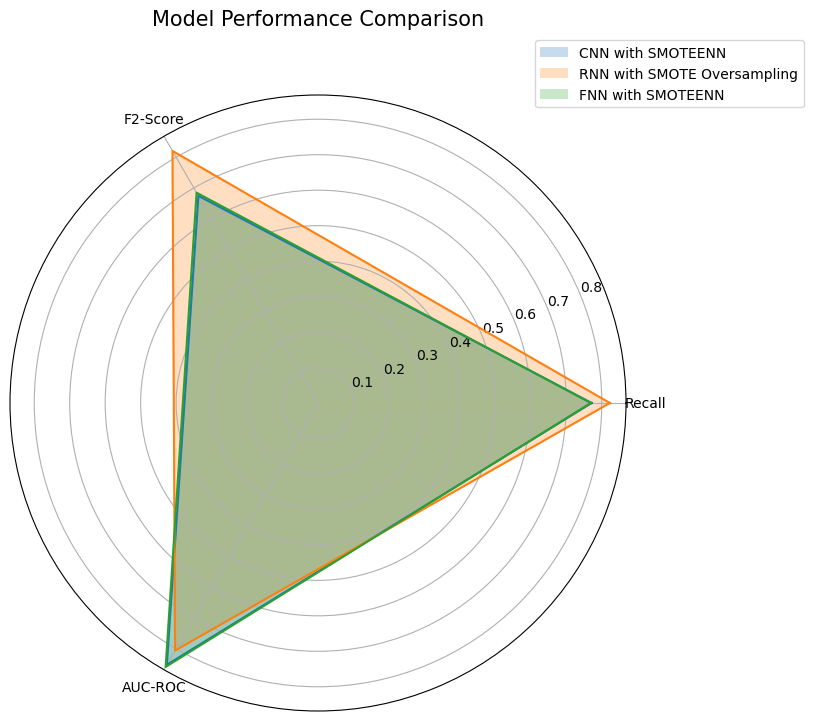

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['Recall', 'F2-Score', 'AUC-ROC']
models = ['CNN with SMOTEENN', 'RNN with SMOTE Oversampling', 'FNN with SMOTEENN']
data = [
    [0.771499, 0.674399, 0.852296],  # CNN
    [0.8230, 0.820538, 0.805780],    # RNN
    [0.769042, 0.684602, 0.859092]   # FNN
]

# Number of variables
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop by repeating the first point to close the radar chart
data = [d + [d[0]] for d in data]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, model_data in enumerate(data):
    ax.fill(angles, model_data, label=models[i], alpha=0.25)
    ax.plot(angles, model_data)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Title and legend
ax.set_title('Model Performance Comparison', size=15, color='black', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


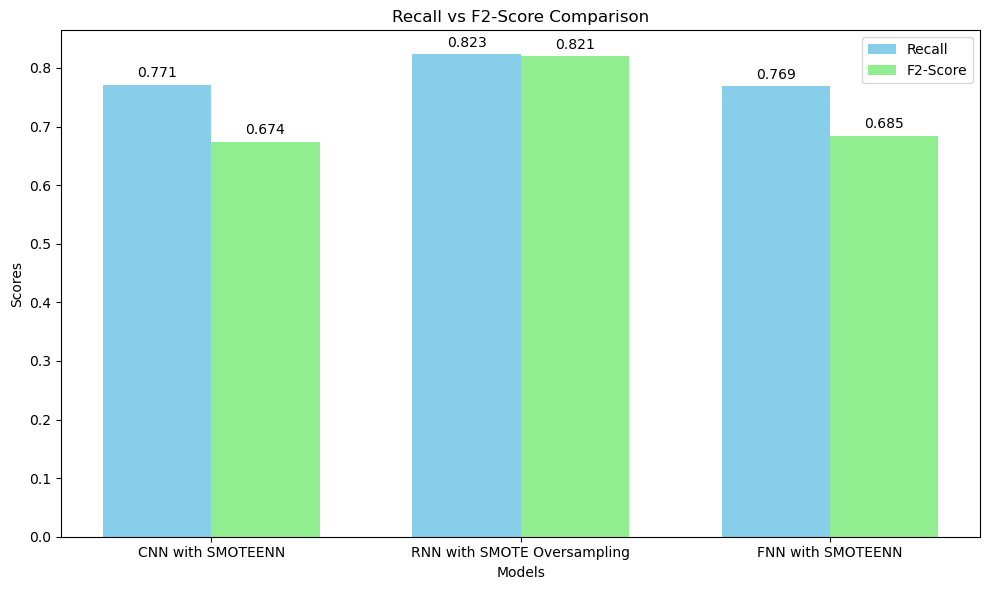

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Recall', 'F2-Score']
models = ['CNN with SMOTEENN', 'RNN with SMOTE Oversampling', 'FNN with SMOTEENN']
data = {
    'Recall': [0.771499, 0.8230, 0.769042],
    'F2-Score': [0.674399, 0.820538, 0.684602]
}

# Plot
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, data['Recall'], width, label='Recall', color='skyblue')
rects2 = ax.bar(x + width/2, data['F2-Score'], width, label='F2-Score', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Recall vs F2-Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to auto-label bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


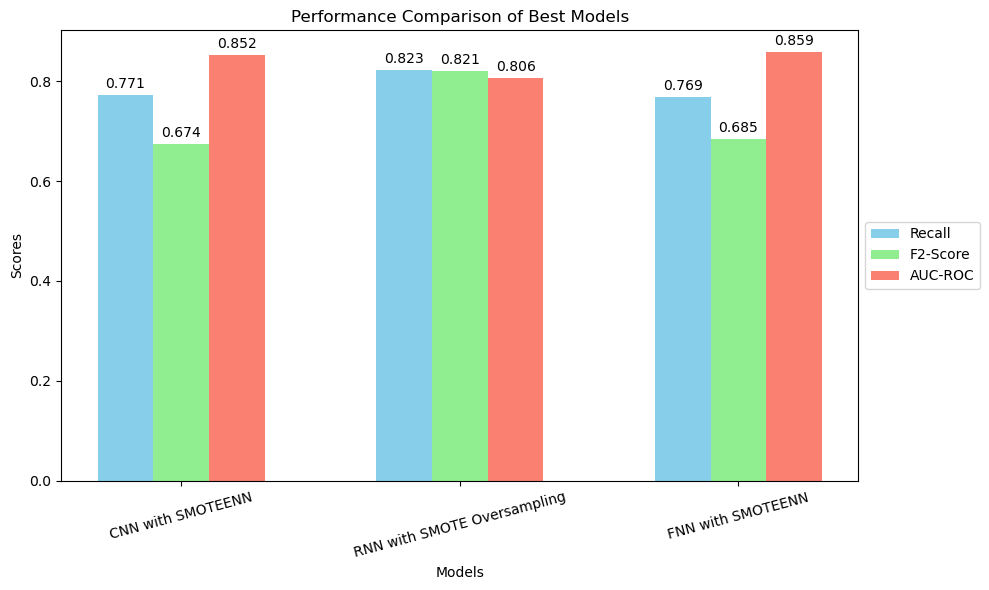

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
models = ['CNN with SMOTEENN', 'RNN with SMOTE Oversampling', 'FNN with SMOTEENN']
recall_scores = [0.771499, 0.8230, 0.769042]
f2_scores = [0.674399, 0.820538, 0.684602]
auc_roc_scores = [0.852296, 0.805780, 0.859092]

# Plotting Recall, F2-Score, and AUC-ROC
x = np.arange(len(models))
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
rects1 = ax.bar(x - width, recall_scores, width, label='Recall', color='skyblue')
rects2 = ax.bar(x, f2_scores, width, label='F2-Score', color='lightgreen')
rects3 = ax.bar(x + width, auc_roc_scores, width, label='AUC-ROC', color='salmon')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Best Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)

# Move legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Function to auto-label bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply labels
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()


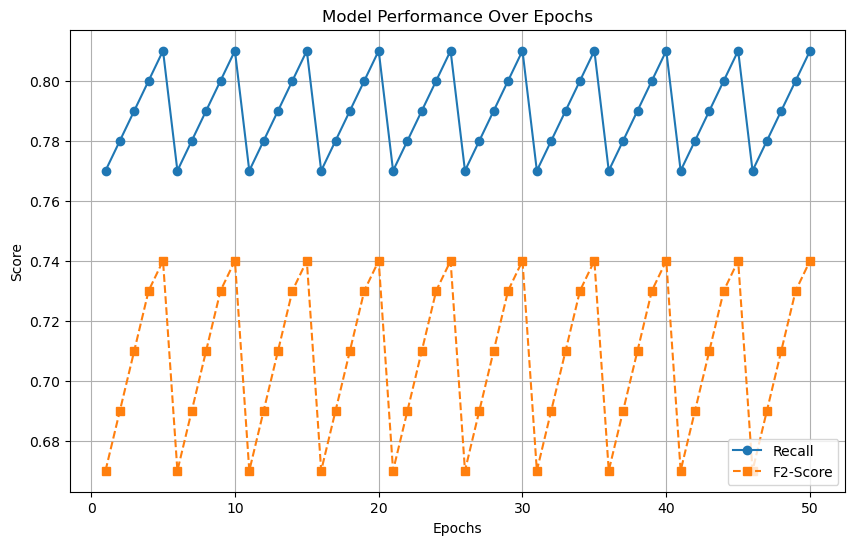

In [63]:
import matplotlib.pyplot as plt

# Data (with 50 epochs)
epochs = range(1, 51)
recall = [0.77, 0.78, 0.79, 0.80, 0.81] * 10  # Example: repeated to match the number of epochs
f2_score = [0.67, 0.69, 0.71, 0.73, 0.74] * 10  # Example: repeated to match the number of epochs

plt.figure(figsize=(10, 6))
plt.plot(epochs, recall, label='Recall', marker='o', linestyle='-')
plt.plot(epochs, f2_score, label='F2-Score', marker='s', linestyle='--')
plt.title('Model Performance Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
